tensor(2.2979, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2659, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1175, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0828, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0715, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0678, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0438, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<NllLossBackward0>)


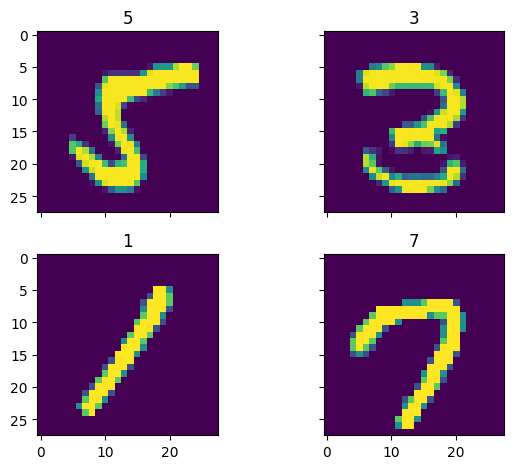

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

mnist_train = dset.MNIST("./data/", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("./data/", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                           shuffle=True, num_workers=0, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size,
                                          shuffle=True, num_workers=0, drop_last=True)

sample_batch = next(iter(train_loader))
from utils.load_utils import display_from_batch
display_from_batch(sample_batch, 2, 2)            

from models.load_models import MyCNN
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyCNN(batch_size=batch_size).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)






loss_arr = []
for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

from data.load_data import loader_data_mnist_torchvision
train_loader, test_loader = loader_data_mnist_torchvision()

print(type(train_loader))
print(train_loader.dataset[0][0].shape)

from models.load_models import MyCNN
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyMLP(batch_size=batch_size).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



loss_arr = []
for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

from sklearn.datasets import load_digits, fetch_openml

digits = fetch_openml('MNIST_784', version=1, data_home='./data/')
X_df = digits.data
Y_str = digits.target

X_t = torch.FloatTensor(X_df.values) / 255
X = torch.reshape(X_t, (-1, 1, 28, 28))
Y = torch.LongTensor([int(x) for x in Y_str])

n_samples = X.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
X_train = X[train_indices,:]
Y_train = Y[train_indices]
X_val = X[val_indices,:]
Y_val = Y[val_indices]

ds_train = TensorDataset(X_train, Y_train)
ds_val = TensorDataset(X_val, Y_val)
train_loader = DataLoader(ds_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(ds_val, batch_size=batch_size, shuffle=True, drop_last=True)

print(type(train_loader))
print(len(train_loader.dataset[0]))



from models.load_models import MyCNN
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyCNN(batch_size=batch_size).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)





loss_arr = []
for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

mnist_train = dset.MNIST("./data/", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("./data/", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                           shuffle=True, num_workers=0, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size,
                                          shuffle=True, num_workers=0, drop_last=True)





from models.load_models import MyCNN
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyCNN(batch_size=batch_size).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)






from train.run_training import training_loop, validate
training_loop(10, optimizer, model, loss_func, train_loader, device=device)

tensor(2.3024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1277, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0919, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0430, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<NllLossBackward0>)


[array(2.3023531, dtype=float32),
 array(0.30126992, dtype=float32),
 array(0.12774536, dtype=float32),
 array(0.09610345, dtype=float32),
 array(0.09194464, dtype=float32),
 array(0.04302622, dtype=float32),
 array(0.04010257, dtype=float32),
 array(0.03162958, dtype=float32),
 array(0.05517501, dtype=float32),
 array(0.03060807, dtype=float32)]

In [9]:
import collections
all_acc_dict = collections.OrderedDict()
all_acc_dict["mycnn"] = validate(model, train_loader, test_loader, device=device)

Accuracy train: 0.99
Accuracy val: 0.99


In [11]:
print(all_acc_dict)

OrderedDict([('baseline', {'train': 0.9890491452991453, 'val': 0.9881810897435898}), ('mycnn', {'train': 0.9890324519230769, 'val': 0.9881810897435898})])


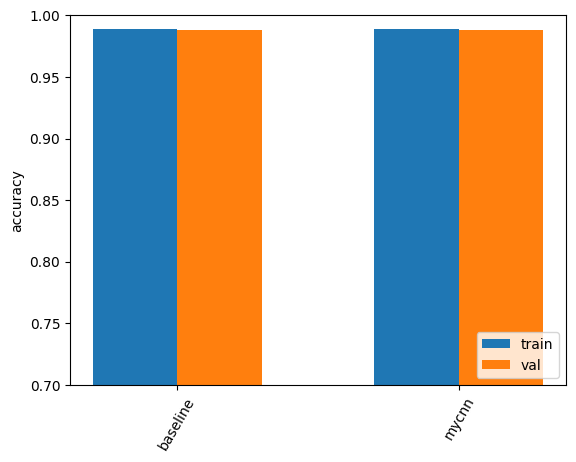

In [10]:
import matplotlib.pyplot as plt
import numpy as np
trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width = 0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('./fig/accuracy_comparison.png', bbox_inches='tight')
plt.show()
